# Analysing smells


In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
smells_df = pd.read_csv("out/smells.csv")
metrics_df = pd.read_csv("out/metrics.csv")

In [3]:
smells_df.groupby(["Approach"]).count()

,Target Project,Train Project,Classifier,Classifier Configuration,Evaluator,Value
Approach,,,,,,
BestOfBreed,2450,2450,2450,2450,2450,2450
KNN,2450,2450,2450,2450,2450,2450
Standard,247500,247500,247500,247500,247500,247500
TestSetNormalization,247500,247500,247500,247500,247500,247500
TrainSetNormalization,247500,247500,247500,247500,247500,247500


In [4]:
smells_df.groupby(["Approach", "Target Project", "Evaluator"]).agg("mean")

Value
Approach              Target Project Evaluator                 
BestOfBreed           accumulo       brier_score_loss  0.495875
                                     f1_score          0.386473
                                     precision_score   0.251372
                                     recall_score      0.868172
                                     roc_auc_score     0.648406
...                                                         ...
TrainSetNormalization zeppelin       brier_score_loss  0.440354
                                     f1_score          0.266137
                                     precision_score   0.216904
                                     recall_score      0.432778
                                     roc_auc_score     0.513123

[2480 rows x 1 columns]

## Compare the different approaches
In the first graphs we will consider the average of the Normalization and Standard approaches.
### Violin Plot -> Compare for AUC ROC

In [5]:
df = smells_df.groupby(["Approach", "Target Project", "Evaluator"]).mean().reset_index()
df = df.loc[df['Evaluator'] == "roc_auc_score"]
df = df.replace("TestSetNormalization", "TestSet\nNormalization")
df = df.replace("TrainSetNormalization", "TrainSet\nNormalization")

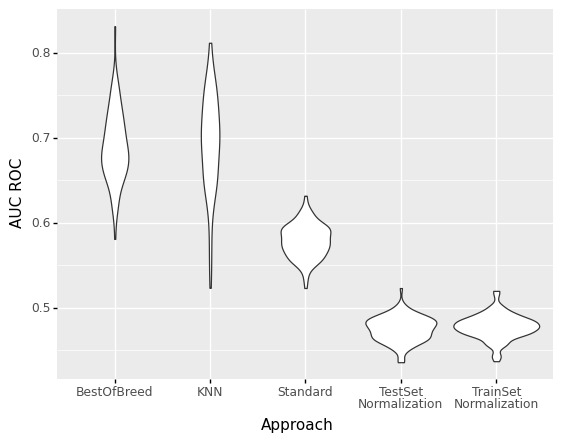

<ggplot: (321874562)>

In [6]:
%matplotlib inline
(ggplot(df, 
        aes(x="factor(Approach)", y="Value"))
 + geom_violin()
 + xlab("Approach")
 + ylab("AUC ROC")
)

### Histogram -> Compare all evaluators

In [7]:
df = smells_df.groupby(["Approach", "Evaluator"]).mean().reset_index()
df = df.replace("TestSetNormalization", "TestSet\nNormalization")
df = df.replace("TrainSetNormalization", "TrainSet\nNormalization")

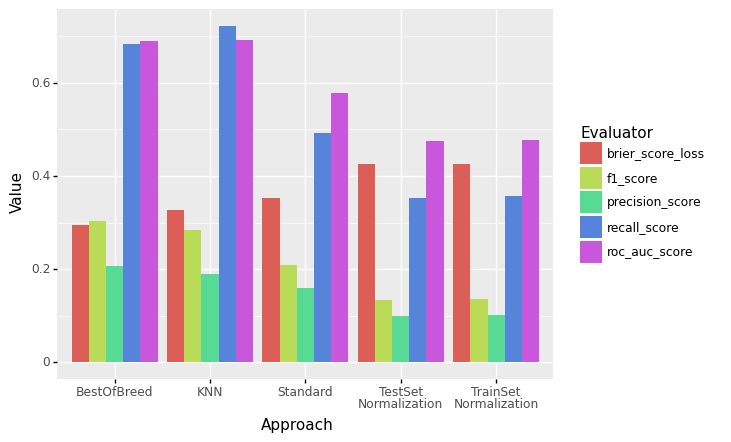

<ggplot: (321994322)>

In [8]:
%matplotlib inline
(ggplot(df, aes(x="Approach", y="Value", fill="Evaluator")) 
 + geom_col(stat='identity', position='dodge'))

Consider the maximum of each metric

In [9]:
df = smells_df.groupby(["Approach", "Target Project", "Train Project", "Evaluator"]).mean().reset_index().groupby(["Approach", "Target Project", "Evaluator"]).max().reset_index()
df = df.loc[df['Evaluator'] == "roc_auc_score"]
df = df.replace("TestSetNormalization", "TestSet\nNormalization")
df = df.replace("TrainSetNormalization", "TrainSet\nNormalization")

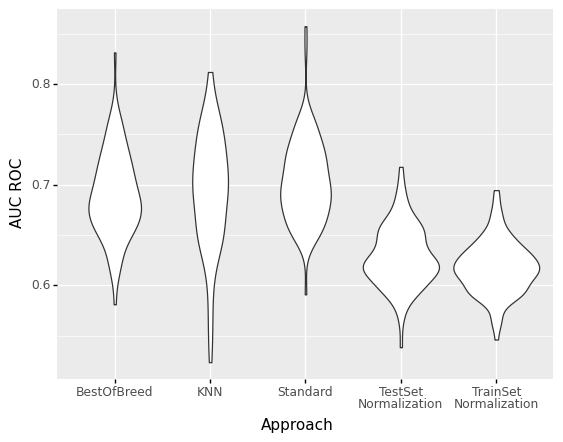

<ggplot: (322020774)>

In [10]:
%matplotlib inline
(ggplot(df, 
        aes(x="factor(Approach)", y="Value"))
 + geom_violin()
 + xlab("Approach")
 + ylab("AUC ROC")
)

## Evaluate the metrics

In [11]:
metrics_df.shape

(76725, 7)

In [12]:
metrics_df.groupby(["Target Project", "Approach"]).count()

Train Project  Classifier  \
Target Project      Approach                                           
accumulo            Standard                        2475        2475   
calcite             Standard                        2475        2475   
cayenne             Standard                        2475        2475   
cocoon              Standard                        2475        2475   
commons-cli         Standard                        2475        2475   
commons-collections Standard                        2475        2475   
                    TestSetNormalization            2475        2475   
                    TrainSetNormalization           2475        2475   
commons-csv         Standard                        2475        2475   
commons-math        Standard                        2475        2475   
                    TestSetNormalization            2475        2475   
                    TrainSetNormalization           2475        2475   
commons-validator   Standard                        2475        2475   
continuum           Standard                        2475        2475   
                    TestSetNormalization            2475        2475   
                    TrainSetNormalization           2475        2475   
curator             Standard                        2475        2475   
                    TestSetNormalization            2475        2475   
                    TrainSetNormalization           2475        2475   
deltaspike          Standard                        2475        2475   
                    TestSetNormalization            2475        2475   
                    TrainSetNormalization           2475        2475   
drill               Standard                        2475        2475   
giraph              Standard                        2475        2475   
                    TestSetNormalization            2475        2475   
                    TrainSetNormalization           2475        2475   
hbase               Standard                        2475        2475   
hive                Standard                        2475        2475   
metron              Standard                        2475        2475   
olingo-odata4       Standard                        2475        2475   
santuario-java      Standard                        2475        2475   

                                           Classifier Configuration  \
Target Project      Approach                                          
accumulo            Standard                                   2475   
calcite             Standard                                   2475   
cayenne             Standard                                   2475   
cocoon              Standard                                   2475   
commons-cli         Standard                                   2475   
commons-collections Standard                                   2475   
                    TestSetNormalization                       2475   
                    TrainSetNormalization                      2475   
commons-csv         Standard                                   2475   
commons-math        Standard                                   2475   
                    TestSetNormalization                       2475   
                    TrainSetNormalization                      2475   
commons-validator   Standard                                   2475   
continuum           Standard                                   2475   
                    TestSetNormalization                       2475   
                    TrainSetNormalization                      2475   
curator             Standard                                   2475   
                    TestSetNormalization                       2475   
                    TrainSetNormalization                      2475   
deltaspike          Standard                                   2475   
                    TestSetNormalization                       2475   
                    TrainSetNorma

### Quick Summary

In [13]:
approaches = set(metrics_df['Approach'])
ppa = {approach: len(metrics_df.loc[metrics_df['Approach'] == approach].groupby(['Target Project'])) for approach in approaches}

print(f"number of projects: {len(metrics_df.groupby(['Target Project']).count())}")
print(f"approaches: {approaches}")
print(f"projects per approach: {ppa}")

number of projects: 19
approaches: {'Standard', 'TestSetNormalization', 'TrainSetNormalization'}
projects per approach: {'Standard': 19, 'TestSetNormalization': 6, 'TrainSetNormalization': 6}


In [14]:
m_df = metrics_df.copy()
s_df = smells_df.copy()

In [15]:
m_col = list(m_df.columns)
m_col[-1] = "Metrics Value"
m_df.columns = m_col

s_col = list(s_df.columns)
s_col[-1] = "Smells Value"
s_df.columns = s_col

In [29]:
df = pd.merge(s_df, m_df, how='inner', left_on=list(m_df.columns[:-1]), right_on=list(m_df.columns[:-1]))

In [30]:
df

,Target Project,Approach,Train Project,Classifier,Classifier Configuration,Evaluator,Smells Value,Metrics Value
0,commons-cli,Standard,accumulo,RandomForestClassifier,{},roc_auc_score,0.807217,0.490329
1,commons-cli,Standard,activemq,RandomForestClassifier,{},roc_auc_score,0.624406,0.592276
2,commons-cli,Standard,activemq-artemis,RandomForestClassifier,{},roc_auc_score,0.670465,0.591216
3,commons-cli,Standard,airavata,RandomForestClassifier,{},roc_auc_score,0.582858,0.537692
4,commons-cli,Standard,archiva,RandomForestClassifier,{},roc_auc_score,0.693495,0.500000
...,...,...,...,...,...,...,...,...
76720,hbase,Standard,tomee,GaussianNB,{},brier_score_loss,0.208476,0.508650
76721,hbase,Standard,uima-ruta,GaussianNB,{},brier_score_loss,0.722723,0.681717
76722,hbase,Standard,wicket,GaussianNB,{},brier_score_loss,0.640141,0.719905
76723,hbase,Standard,xmlgraphics-fop,GaussianNB,{},brier_score_loss,0.778676,0.590553


In [31]:
df_list = list()
columns = list(df.columns)[:-2] + ["Dataset", "Value"] 
for row in df.itertuples():
    row1 = list(row[1:7])
    row2 = list(row[1:7])
    row1.append("Smells")
    row1.append(row[7])
    row2.append("Metrics")
    row2.append(row[8])
    df_list.append(tuple(row1))
    df_list.append(tuple(row2))

df = pd.DataFrame(df_list, columns=columns)

In [32]:
df

,Target Project,Approach,Train Project,Classifier,Classifier Configuration,Evaluator,Dataset,Value
0,commons-cli,Standard,accumulo,RandomForestClassifier,{},roc_auc_score,Smells,0.807217
1,commons-cli,Standard,accumulo,RandomForestClassifier,{},roc_auc_score,Metrics,0.490329
2,commons-cli,Standard,activemq,RandomForestClassifier,{},roc_auc_score,Smells,0.624406
3,commons-cli,Standard,activemq,RandomForestClassifier,{},roc_auc_score,Metrics,0.592276
4,commons-cli,Standard,activemq-artemis,RandomForestClassifier,{},roc_auc_score,Smells,0.670465
...,...,...,...,...,...,...,...,...
153445,hbase,Standard,wicket,GaussianNB,{},brier_score_loss,Metrics,0.719905
153446,hbase,Standard,xmlgraphics-fop,GaussianNB,{},brier_score_loss,Smells,0.778676
153447,hbase,Standard,xmlgraphics-fop,GaussianNB,{},brier_score_loss,Metrics,0.590553
153448,hbase,Standard,zeppelin,GaussianNB,{},brier_score_loss,Smells,0.845923


In [20]:
df = df.groupby(["Approach", "Target Project", "Evaluator", "Dataset"]).mean().reset_index()
df = df.loc[df['Evaluator'] == "roc_auc_score"]

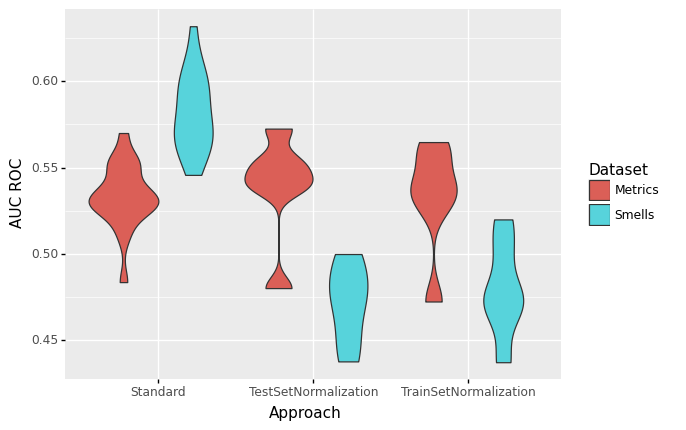

<ggplot: (322063086)>

In [21]:
%matplotlib inline
(ggplot(df, 
        aes(x="factor(Approach)", y="Value", fill="Dataset"))
 + geom_violin()
 + xlab("Approach")
 + ylab("AUC ROC")
)

In [33]:
df = df.groupby(["Approach", "Target Project", "Train Project", "Evaluator", "Dataset"]).mean().reset_index().groupby(["Approach", "Target Project", "Evaluator", "Dataset"]).max().reset_index()
df = df.loc[df['Evaluator'] == "roc_auc_score"]

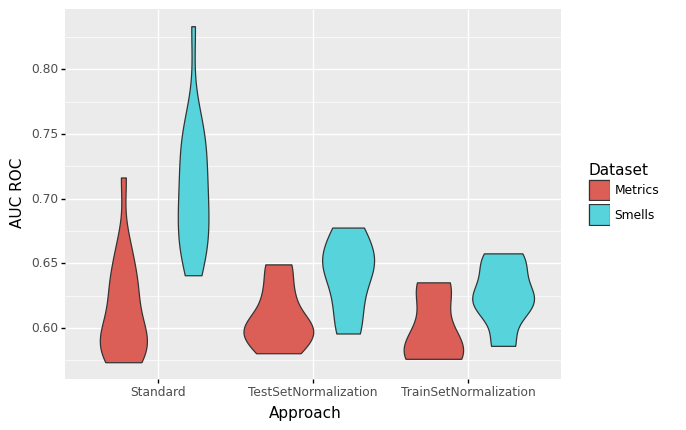

<ggplot: (322037113)>

In [34]:
%matplotlib inline
(ggplot(df, 
        aes(x="factor(Approach)", y="Value", fill="Dataset"))
 + geom_violin()
 + xlab("Approach")
 + ylab("AUC ROC")
)